## Práctica 4: Regresión logística regularizada

Grupo 5: Jorge Ortega y Daniela Vidal

In [178]:
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

### 1. Leemos y visualizamos los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
valores=read_csv("/content/drive/MyDrive/AA/p4/data4.csv",header=None).to_numpy()

In [180]:
valores = read_csv('data4.csv', header=None).to_numpy()

Guardamos en X y en Y los datos que usaremos para el entrenamiento

In [181]:
X = valores[:, 0:2]
Y = valores[:, 2]

Función para pintar los datos en una gráfica

In [182]:
def plot_data(X, Y):
    X_n = X[Y == 0]
    X_p = X[Y == 1]
    plt.scatter(X_n[:, 0], X_n[:, 1], marker='.', c='r', label = "y = 0")
    plt.scatter(X_p[:, 0], X_p[:, 1], marker='+', c='g', label = "y = 1")
    plt.legend()
    plt.show()

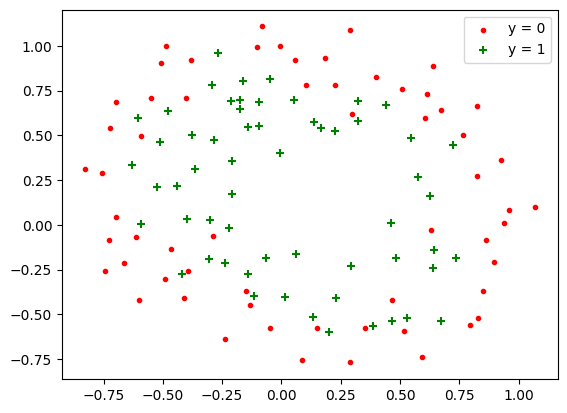

In [183]:
plot_data(X, Y)

### 2. Mapeo de los atributos

Mapeamos los atributos en términos polinómicos hasta la sexta potencia. El vector, que antes tenía 2 "features", ahora tiene 27.

In [184]:
def map_feature(X1, X2):
    """
    Feature mapping function to polynomial features    
    """

    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    
    degree = 6
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)

In [185]:
XX = map_feature(X[:, 0], X[:, 1])
print(XX.shape)

(118, 27)


### 3. Cálculo de la función de coste y su gradiente

Definición de la función sigmoide a la que se le pasa el vector w, el valor de b y el vector x y se hace el producto escalar para calcular z.

In [186]:
def func_sigmoide(x, w, b):
    z = np.dot(x,w)+b
    return 1/(1+np.exp(-z))

Función que devuelve la predicción según el modelo entrenado.

In [187]:
def predict(X, Y, w, b):
    XX = map_feature(X[:, 0], X[:, 1])
    y_hat= func_sigmoide(XX, w, b)
    y_hat = np.where(y_hat >= 0.5, 1, 0)
    return y_hat

Función de coste regularizada:

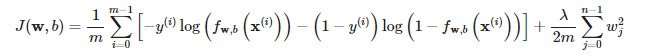

In [188]:
def func_coste(X, Y, w, b, L):
    m = len(Y)
    f = func_sigmoide(X, w, b)
    coste = (-1/m)*np.sum(Y*np.log(f)+(1-Y)*np.log(1-f))
    coste += (L/(2*m))*np.sum(w**2)
    return coste

La función del cálculo de gradiente con regularización es:

Para w

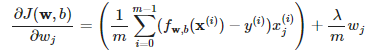

Para b 

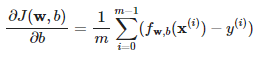

In [189]:
def funcion_grad(X, y, w, b, L):
    m = len(y)
    gw = np.zeros(w.shape)
    gb = 0
    y_hat = func_sigmoide(X, w, b)
    dif = y_hat-y
    
    gb = np.sum(dif)/m                                    
    gw = (1/m) * np.dot(dif,X) + L*w/m
    
    return gw, gb

### 4. Cálculo del valor óptimo de los parámetros

Aprendemos los valores de w y de b con el descenso de gradiente con Lambda = 1 (hemos decicido este valor según los resultados del apartado 5), w y b inicialmente 0 y alfa 0.001 (un valor lo suficientemente pequeño como para garantiza runa solución sin que tarde demasiado en encontrarla).  

In [190]:
def funcion_grad_desc(X, y, w, b, alpha, num_iter, L):   
    for i in range(num_iter):
        gw, gb = funcion_grad(X, y, w, b, L)
        w = w - alpha*gw
        b = b - alpha*gb
    return w, b

In [191]:
w = np.zeros(XX.shape[1])
b = 0
w, b = funcion_grad_desc(XX, Y, w, b, 0.001, 100000, 1)

Se evalua la precisión con los valores del entrenamiento (con lo cual no hay duda de que debería ser alto).

In [192]:
y_hat = predict(X, Y, w, b)
print("Accuracy: ", np.mean(y_hat == Y)*100, "%")

Accuracy:  83.05084745762711 %


Funciones necesarias para pintar la barrera de decisión.

In [193]:
import matplotlib.pyplot as plt

def non_linear_decision_boundary(w, b, X):
    x1 = np.linspace(-0.75, 1.0, 100)
    x2 = np.linspace(-0.75, 1.0, 100)
    x1, x2 = np.meshgrid(x1, x2)
    X = np.c_[x1.ravel(), x2.ravel()]
    XX = map_feature(X[:, 0], X[:, 1])
    y_hat = func_sigmoide(XX, w, b)
    y_hat = y_hat.reshape(x1.shape)
    return x1, x2, y_hat

def pintar_grafica(x1,x2,y_hat, Lambda = 1):
    X_n = X[Y == 0]
    X_p = X[Y == 1]
    plt.scatter(X_n[:, 0], X_n[:, 1], marker='.', c='r', label = "y = 0")
    plt.scatter(X_p[:, 0], X_p[:, 1], marker='+', c='g', label = "y = 1")
    plt.contour(x1, x2, y_hat, [0.5], linewidths=1, colors='b')
    plt.legend()
    plt.title('Valor de lambda = ' + str(Lambda) )
    plt.show()

#### Con valor de Lambda 1:

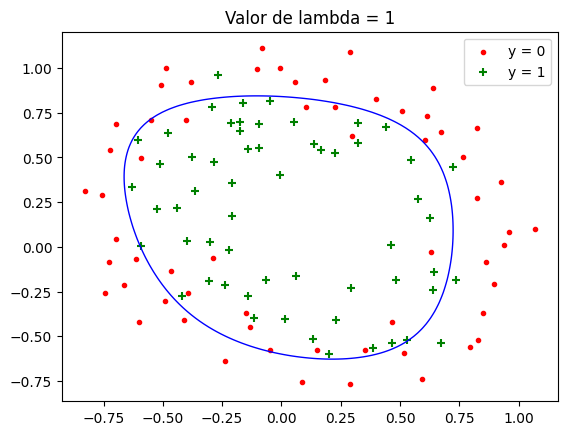

In [194]:
x1, x2, y_hat = non_linear_decision_boundary(w, b, X)
pintar_grafica(x1,x2,y_hat, 1)

Se puede ver que con valor de lambda 1 la barrera de decisión se ajusta muy bien a los datos y divide los 0's de los 1's sin llegar a hacer overfitting.

### 5. Efectos de la regularización

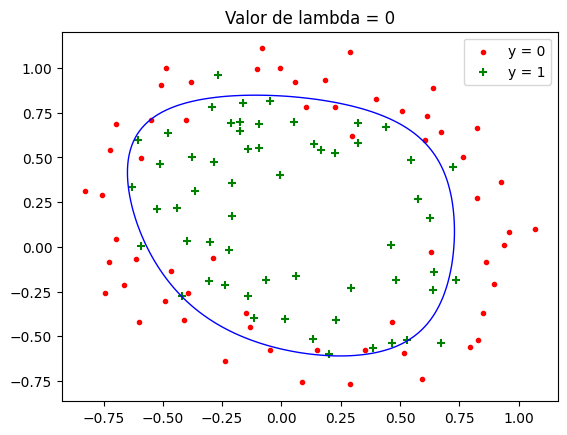

In [195]:
w = np.zeros(XX.shape[1])
b = 0
w, b = funcion_grad_desc(XX, Y, w, b, 0.001, 100000, 0)
x1, x2, y_hat = non_linear_decision_boundary(w, b, X)
pintar_grafica(x1,x2,y_hat, 0)

Con el valor de lambda 0 no se regularizan los parametros, con lo cual puede ocurrir overfitting. 

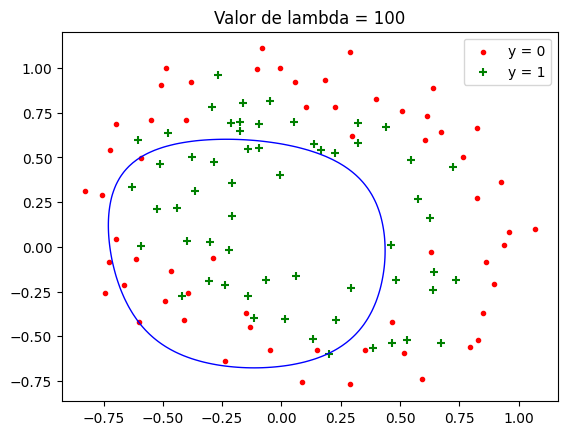

In [196]:
w = np.zeros(XX.shape[1])
b = 0
w, b = funcion_grad_desc(XX, Y, w, b, 0.001, 100000, 100)
x1, x2, y_hat = non_linear_decision_boundary(w, b, X)
pintar_grafica(x1,x2,y_hat, 100)

Con el valor de lambda 100 es demasiado alto y se puede ver que no separa bien los valores, esto es porque le está dando demasiada poca importancia a los parametros de entrada.

##### Calculamos las precisiones con distintos valores de lambda (del 1 al 100) y los ejemplos de entrenamiento para ver como este hiperparámetro afecta al aprendizaje. 

In [197]:
i= 0
accs = np.zeros(100)

while i < 100:
    w = np.zeros(XX.shape[1])
    b = 0
    w,b = funcion_grad_desc(XX, Y, w, b, 0.001, 100000, i)
    y_ht = predict(X, Y, w, b)
    accs[i] = np.sum(y_ht == Y)/len(Y) * 100
    i+=1
    

Se puede ver en la gráfica que los mejores resultados son para valores de lambda pequeños como 0 o 1, mientras que para valores de lambda grandes como 100 el modelo se sobreajusta a los datos de entrenamiento.

Esto se debe a que el término de regularización penaliza los valores de los parámetros del modelo, por lo que si el valor de lambda es muy grande, los parámetros se hacen muy pequeños y el modelo no es capaz 
de aprender los patrones de los datos de entrenamiento.


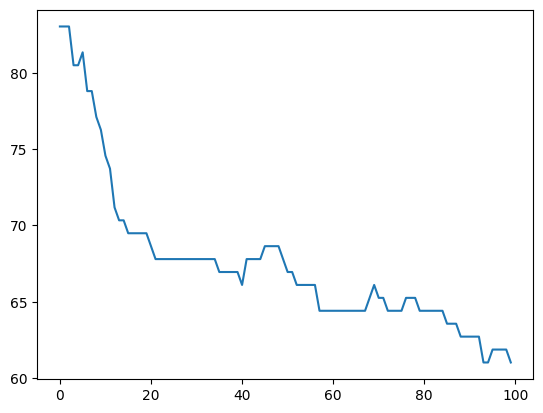

In [198]:
x1 = np.array([i for i in range(100)])
plt.plot(x1, accs)